# Лабораторная работа №1

**Требования:**
* Python >= 3.X

Лабораторную работу необходимо выполнять в данном шаблоне. Результатом работы будет являться файл (с измененным именем), который необходимо выложить в Moodle.

**Важно!!!** Имя файлу задавайте по следующему шаблону **lab_1_Группа_ФамилияИО.ipynb**. Например: если Вас зовут Иванов Иван Иванович, и Вы обучаетесь в группе 6207_010302D, то имя файла будет выглядеть так **lab_1_6407_010302D_ИвановИИ.ipynb**.

In [ ]:
# Код загрузки данных
# Если хотите добавить какие-либо библиотеки
# добавляйте их ИМЕННО ЗДЕСЬ
import nltk
nltk.download('gutenberg', quiet=True)
nltk.download('punkt', quiet=True)
import inflect
import re
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from nltk.util import ngrams

nltk.download('punkt')

# Наименования книг
books = []
# Содержимое книг
raw_texts = []

for fileid in nltk.corpus.gutenberg.fileids():
    books.append(fileid)
    raw_texts.append(nltk.corpus.gutenberg.raw(fileid))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Шаг №1
Предобработайте тексты, которые содержатся в списке `raw_texts`, но сначала внимательно изучите их структуру. Сохраните полученные данные в списке `books_tokens` (в разрезе книг, как и было с сырыми текстами).

Порядок обработки текста:
* Замените все числа, которые представлены цифрами, их текстовым представлением (т.е. прописью). Пример: 1 = one, 23 = twenty three, 1042 = one thousand forty two, и т.п. См. библиотеку **inflect**.
* Приведите текст к нижнему регистру
* Произведите токинезацию, в качестве токенов выступают слова.

Подсказка: рекомендуется отлаживать алгоритмы на паре книг, рассчеты на всем корпусе идут продолжительное время.

In [ ]:
infl = inflect.engine()

books_tokens = []

for text in raw_texts[:2]:
  numbers = re.findall('(\d+)', text)

  for number in numbers:
    text = text.replace(number, infl.number_to_words(int(number))).lower()
  #print(text)
  tokens = word_tokenize(text)
  print(tokens)
  books_tokens.append(tokens)

['[', 'emma', 'by', 'jane', 'austen', 'one', 'thousand', ',', 'eight', 'hundred', 'and', 'sixteen', ']', 'volume', 'i', 'chapter', 'i', 'emma', 'woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.', 'she', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', ',', 'indulgent', 'father', ';', 'and', 'had', ',', 'in', 'consequence', 'of', 'her', 'sister', "'s", 'marriage', ',', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', '.', 'her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses', ';', 'and',

#### Шаг №2

* Вычислите словари для каждой книги (переменная `books_vocabularies`).
* Вычислите словарь для всего корпуса (переменная `books_vocabulary`).
* Рассчитайте частоту употребления токенов в корпусе (переменная `freq_tokens`), и постройте график зависимости частоты употребления токена от токена (для 30-ти самых популярных).

In [ ]:
books_vocabularies = [set(tokens) for tokens in books_tokens]

for vocabulary in books_vocabularies:
    print(vocabulary)

{'supplication', '_blunder_', 'boyish', "woodhouse's", '_amor_', 'deadening', 'pleasanter', 'carrot', 'ideas', 'supplanted', 'slap', 'deservedly', 'begun', 'barnes', 'irregular', '_gentleman_', 'pleasanter.', 'tedious', 'despoiling', 'hearing', 'composedly', 'seven-and-twenty', 'falling', 'let', 'papa', 'goodhumoured', 'my', '_doubts_', 'allowance', 'acquaintance', 'tenderness', 'oppressed', 'boiling', 'merest', 'dentist', 'attributing', 'mend', 'passing', '_perfection_', 'kind-hearted', "father's", 'disengaged', 'hour.', 'chuses', 'involvement', 'recollect', 'refinement.', 'came', 'boils', 'rises', 'supposed', 'admires', 'measuring', 'm', 'adherence', 'fireside', 'continual', 'behaviour.', 'undertakes', 'conservatory', 'feminine', 'tendency', 'withdrawn', 'agreed', 'dinner', 'unexampled', 'sixpences', 'happening', 'different', 'detaining', "harriet's", 'hungry', 'motive', 'uneasiness', 'fairy', 'shows', 'assistance', 'proves', 'devotion', 'widely', 'fondling', 'enumerate', 'enough.', 

In [ ]:
all_tokens = [token for tokens in books_tokens for token in tokens]
books_vocabulary = set(all_tokens)
print(books_vocabulary)

{'mortgage', 'supplication', '_blunder_', 'boyish', "woodhouse's", '_amor_', 'deadening', 'stroll', 'pleasanter', 'carrot', 'ideas', 'supplanted', 'slap', 'deservedly', 'begun', 'barnes', 'irregular', 'mouths', '_gentleman_', 'pleasanter.', 'tedious', 'despoiling', 'hearing', 'composedly', 'seven-and-twenty', 'falling', 'let', 'papa', 'goodhumoured', 'my', '_doubts_', 'allowance', 'acquaintance', 'tenderness', 'oppressed', 'boiling', 'merest', 'barrier', 'dentist', 'attributing', 'mend', 'passing', '_perfection_', 'kind-hearted', "father's", 'resembling', 'disengaged', 'hour.', 'chuses', 'involvement', 'recollect', 'refinement.', 'came', 'boils', 'rises', 'supposed', 'admires', 'measuring', 'm', 'adherence', 'fireside', 'continual', 'folding-doors', 'rated', 'behaviour.', 'undertakes', 'conservatory', 'feminine', 'tendency', 'withdrawn', 'eyed', 'agreed', 'dinner', 'unexampled', 'sixpences', 'happening', 'different', 'detaining', "harriet's", 'hungry', 'motive', 'uneasiness', 'fairy', 

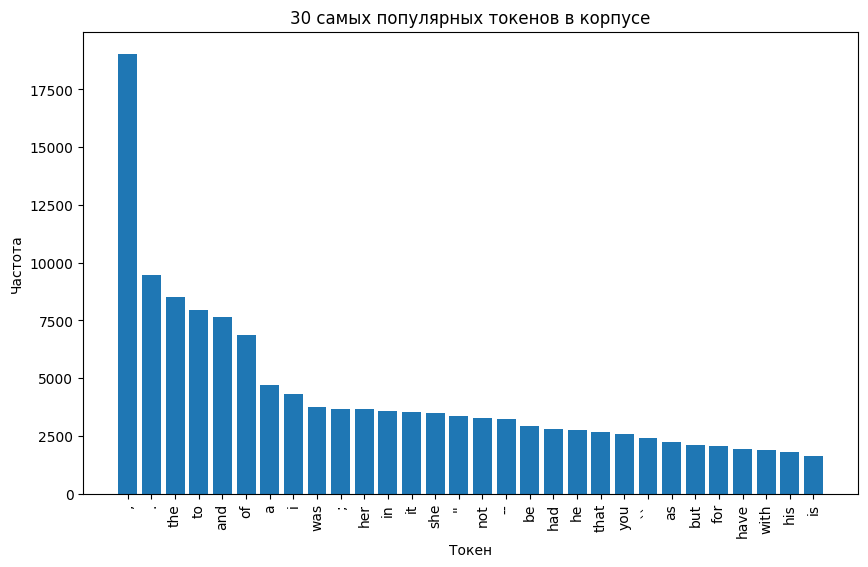

In [ ]:
freq_tokens = nltk.FreqDist(all_tokens)
top_30_tokens = freq_tokens.most_common(30)
tokens, frequencies = zip(*top_30_tokens)

plt.figure(figsize=(10, 6))
plt.bar(tokens, frequencies)
plt.xticks(rotation=90)
plt.xlabel('Токен')
plt.ylabel('Частота')
plt.title('30 самых популярных токенов в корпусе')
plt.show()

#### Шаг №3
* Сгенерируйте список триграмм (переменная `trigrams`) по всему корпусу и рассчитайте частоту их употребления (переменная `freq_trigrams`).
* Реализуйте наивный генератор текста (30 токенов).
    1. Для затравки берется два стартовых токена, которые становятся текущими. Первый токен выводится на экран.
    2. Второй токен из активной пары токенов выводится на экран. Если мы сгененрировали нужное количество текста, то останавливаем алгоритм.
    3. По текущей паре токенов (первые в триграмме) определяется наиболее употребительная траграмма, которая помечается как использованная. Использованные триграммы на последующих шагах в рассмотрении не участвуют. Второй и третий токены данной триграммы становятся текущими. Переходим к п. 2.

In [ ]:
trigrams = ngrams(all_tokens, 3, pad_left=True, pad_right=True, left_pad_symbol = '</s>', right_pad_symbol = '</s>')
freq_trigrams = nltk.FreqDist(trigrams)

In [ ]:
def text_generator(freq_trigrams, start_tokens, num_tokens):
    generated_text = list(start_tokens)

    while len(generated_text) < num_tokens:
        curr_pair = tuple(generated_text[-2:])
        trigrams_start_curr_pair = [trigram for trigram in freq_trigrams if trigram[:2] == curr_pair]
        if not trigrams_start_curr_pair:
            break
        popular_trigram = max(trigrams_start_curr_pair, key=lambda x: freq_trigrams[x])
        generated_text.extend(popular_trigram)
        del freq_trigrams[popular_trigram]

    print(' '.join(generated_text))

start_tokens = ['i', 'am']

text_generator(freq_trigrams, start_tokens, 30)
text_generator(freq_trigrams, start_tokens, 30)
text_generator(freq_trigrams, start_tokens, 30)
text_generator(freq_trigrams, start_tokens, 30)

i am i am sure am sure you sure you are you are very are very kind very kind , kind , '' , '' said '' said he said he ,
i am i am not am not at not at all at all . all . '' . '' `` '' `` i `` i am i am very am very much
i am i am afraid am afraid you afraid you will you will not will not be not be afraid be afraid of afraid of being of being in being in love
i am i am quite am quite of quite of your of your being your being a being a very a very good very good sort good sort of sort of thing
